# Stable Diffusion con Google Colab y DreamStudio

## Instalación de Transformers

In [2]:
!pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-7s4xzm11
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-7s4xzm11
  Resolved https://github.com/huggingface/diffusers.git to commit ee20d1f8b9e209f204dd3c9e4b089468f9c7543e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 87.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.1 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.15.0.dev0-py3-none-any.whl size=827805 sha256=629556a3a5224cd4a7762b6214

## Importando librerías

In [3]:
import torch

## Estructura de Hugging Face

In [4]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the Euler scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")




Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


## Generando imágenes

In [5]:
prompt = 'a photo of a dog with a hat'
image = pipe(prompt).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

In [6]:
image.save('girl_1.png')

## Tamaño de la imagen

In [7]:
prompt = 'white hair, intricate blue armor, beautiful detailed face, beautiful Colombian girl, medium length white hair, toned stomach, showing abdomen, Hyperrealism, by Greg Rutkowski, 8k'
image = pipe(prompt, height=512, width=768).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

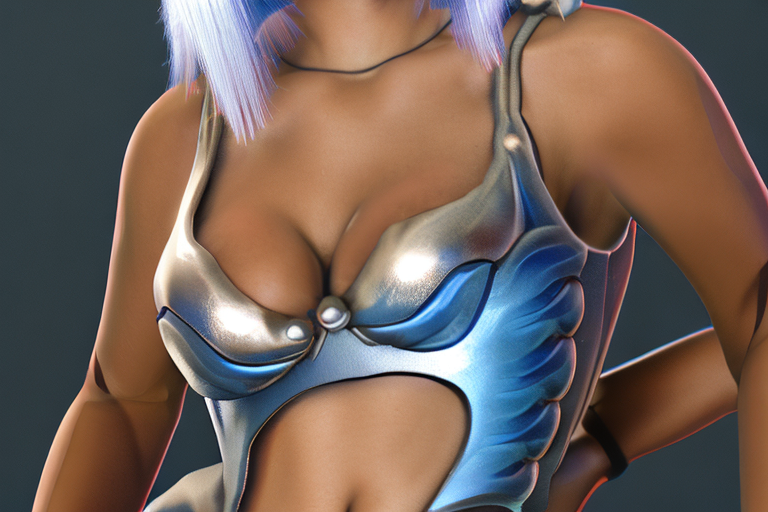

In [8]:
image

## Pasos de iteración

In [24]:
prompt = 'Face ,white hair, intricate blue armor, beautiful detailed face, beautiful Colombian girl, medium length white hair, toned stomach, showing abdomen, Hyperrealism, by Greg Rutkowski, 8k'
image = pipe(prompt, height=512, width=768, num_inference_steps= 10).images[0]


  0%|          | 0/10 [00:00<?, ?it/s]

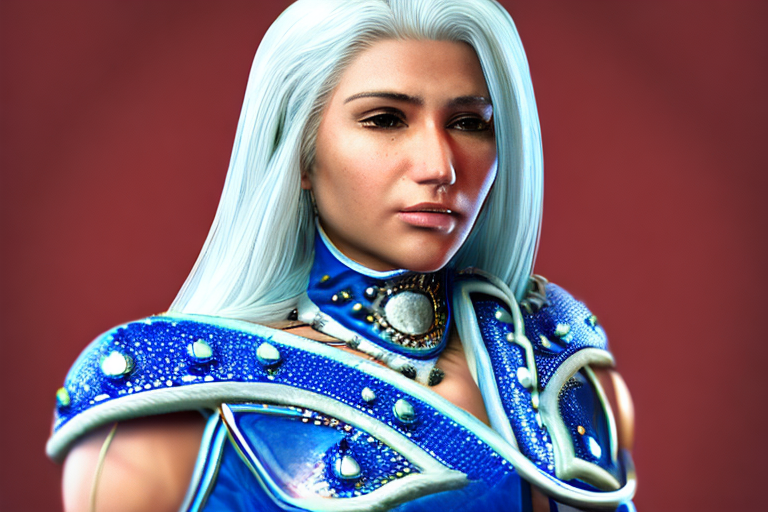

In [22]:
image

In [23]:
image.save('girl_2.png')

## Guidance scale

In [11]:
prompt = 'white hair, intricate blue armor, beautiful detailed face, beautiful Colombian girl, medium length white hair, toned stomach, showing abdomen, Hyperrealism, by Greg Rutkowski, 8k'
image = pipe(prompt, height=512, width=768, num_inference_steps= 30, guidance_scale=12).images[0]


  0%|          | 0/30 [00:00<?, ?it/s]

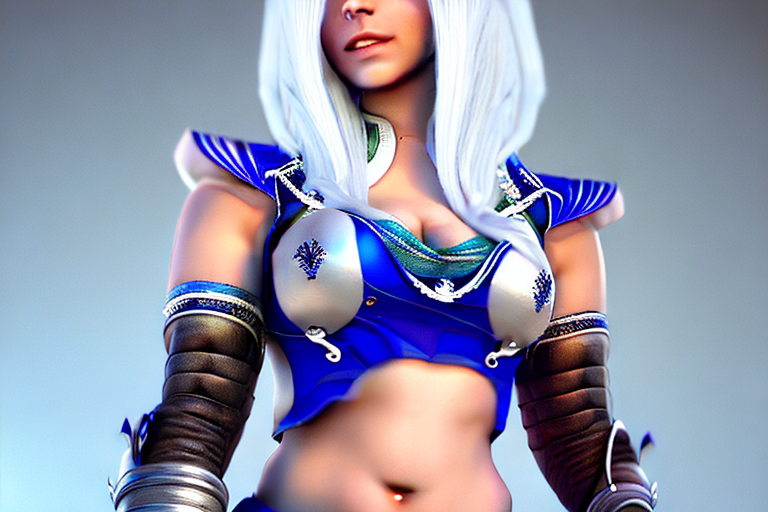

In [12]:
image

In [ ]:
image.save('girl_3.png')